Lets Have some theory abt the SVR


In [2]:
from IPython.display import Image


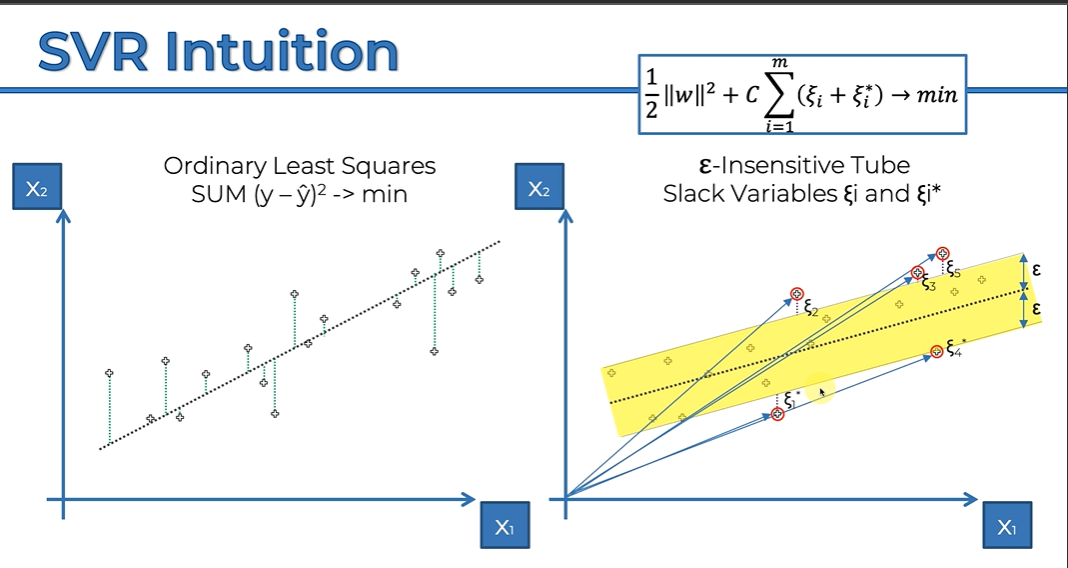

In [3]:
Image(filename=r"C:\Users\AKASH\Pictures\Screenshots\svr.png",width=800,height=600)

 the points in the "YELLOW BAND" ,the error of these points is ignored but the point outside only considered to 
 the evaluation for the slope of the BAND 


In [4]:
# importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [5]:
data = pd.read_csv(r"C:\Users\AKASH\Desktop\ML\Machine Learning A-Z (Codes and Datasets)\Regression\Section 7 - Support Vector Regression (SVR)\Python\Position_Salaries.csv")

In [6]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [22]:
# importing Data 
X = data["Level"].values.reshape(-1,1)
y = data["Salary"].values.reshape(-1,1)


In [23]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [24]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [25]:
# Feature scalling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [26]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [27]:
y # standerd scalling gives the output between [-3,3]

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

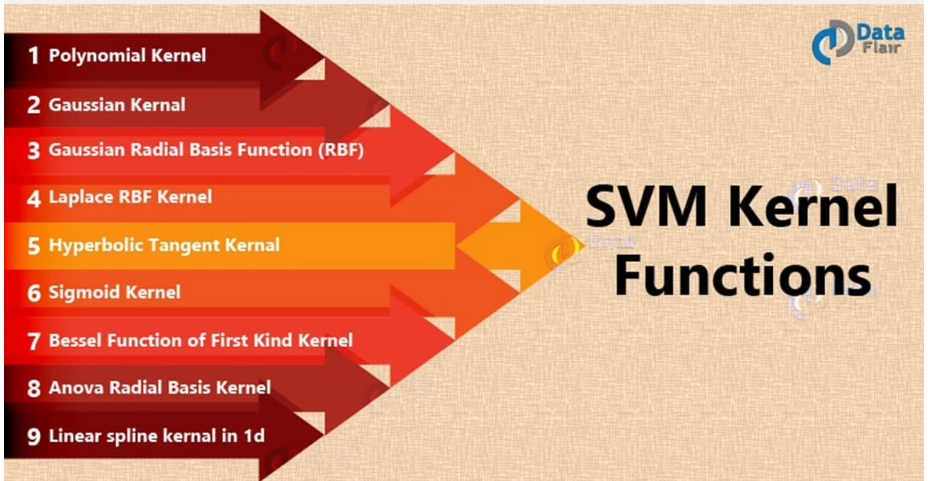

In [31]:
Image(filename=r"C:\Users\AKASH\Pictures\Screenshots\kernal2.png",width=800,height=600)

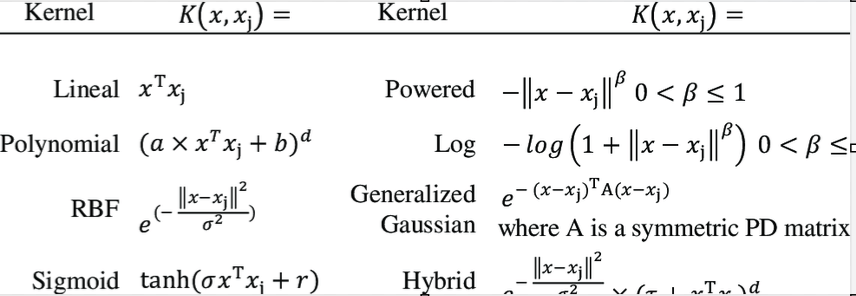

In [29]:
Image(filename=r"C:\Users\AKASH\Pictures\Screenshots\kernal.png",width=800,height=600)

In [33]:
# training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X,y)

C:\Users\AKASH\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [34]:
# Predicting a new result 
#  before making a prediction we need to reverse the scalling 
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

# Visualization of the results

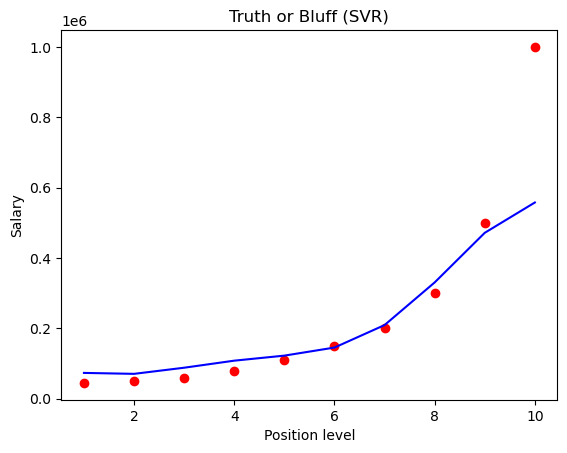

In [36]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')  # first reverse scaling is Done from both the scaler objects 
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
# here we get a nice prector curve

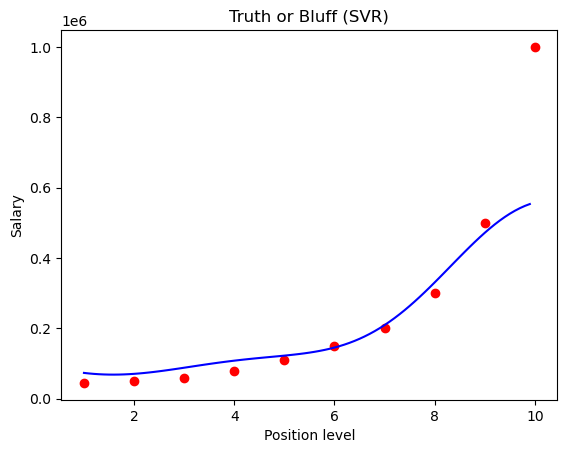

In [37]:
#  To get more smooth curve 
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()